In [1]:
import pandas as pd
import seaborn as sn
import numpy as np

from sklearn.preprocessing import Imputer
from sklearn.utils import shuffle
from sklearn import tree
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./data/sesion_joind_gender.csv')

Use back fill 来保证最少程度减少bias.

In [3]:

df = df.fillna(method="backfill")
df = df.fillna(method="ffill")

Seperate training and target data

In [4]:
Y = df.country_destination
df.drop(["country_destination", "id","date_account_created","timestamp_first_active"], 1, inplace=True)

In [5]:
Y.head()

0       US
1      NDF
2       US
3    other
4       US
Name: country_destination, dtype: object

In [6]:
# one-hot-encode all the categorical data:
# gender signup_method language affiliate_channel 
# affiliate_provider first_affiliate_tracked signup_app	
# first_device_type first_browser	country_destination
oh_gender = pd.get_dummies(df.gender, prefix="gender")
oh_language = pd.get_dummies(df.language, prefix="language")
oh_signup_method = pd.get_dummies(df.signup_method, prefix="signup_method")
oh_affiliate_channel = pd.get_dummies(df.affiliate_channel, prefix="affiliate_channel")
oh_affiliate_provider = pd.get_dummies(df.affiliate_provider, prefix="affiliate_provider")
oh_first_affiliate_tracked = pd.get_dummies(df.first_affiliate_tracked, prefix="first_affiliate_tracked")
oh_signup_app = pd.get_dummies(df.signup_app, prefix="signup_app")
oh_first_device_type = pd.get_dummies(df.first_device_type, prefix="first_device_type")
oh_first_browser = pd.get_dummies(df.first_browser, prefix="first_browser")

#dropped date_account_created date_first_booking add back later
df.drop(['gender', 'signup_method',
         'language', 'affiliate_channel', 
         'affiliate_provider', 'first_affiliate_tracked', 
         'signup_app', 'first_device_type', 'first_browser'],1,inplace=True)
# from the traning set
x_train = pd.concat([df,oh_gender, oh_language, 
                oh_signup_method, oh_affiliate_channel, 
                oh_affiliate_provider,
                oh_first_affiliate_tracked, oh_signup_app,
                oh_first_device_type, oh_first_browser],axis=1)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_real_train, x_test, y_train, y_test = train_test_split(x_train,Y, test_size=0.3)

clf = RandomForestClassifier(random_state=2, min_samples_split=2)
clf.fit(x_real_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [8]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import seaborn as sn
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [9]:
result_lable =[]
for data in y_train:
    if data not in result_lable:
        result_lable.append(data)
print result_lable

['NDF', 'FR', 'GB', 'US', 'IT', 'ES', 'other', 'CA', 'DE', 'NL', 'AU', 'PT']


In [10]:
y_predict = clf.predict(x_test)
precision, recall, fscore, support = score(y_test, y_predict, labels = result_lable, average=None)
print('precision: {}'.format(precision))
print precision_score(y_test, y_predict, average='weighted') 
print accuracy_score(y_test, y_predict)

precision: [ 0.66175156  0.          0.          0.44243792  0.          0.          0.
  0.          0.          0.          0.          0.        ]
0.527789853607
0.622956909361


/Users/lixiaochi/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lixiaochi/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


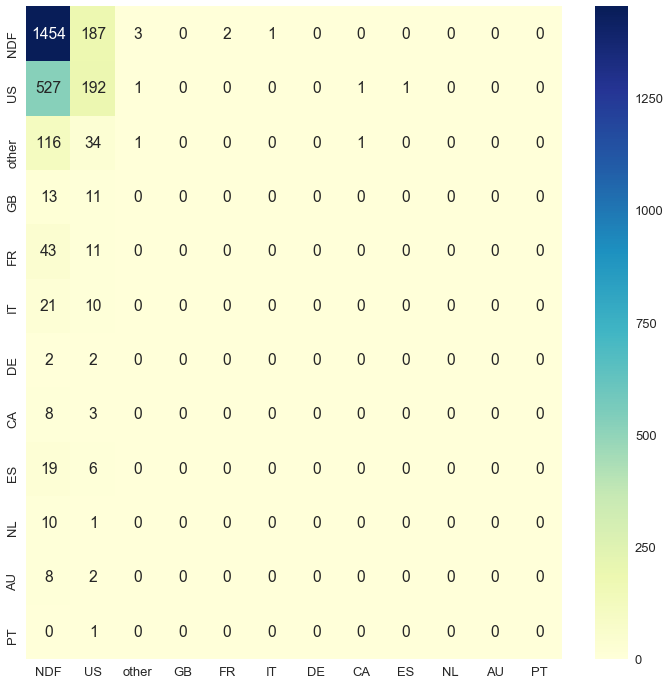

In [57]:
cnf_matrix = confusion_matrix(y_test, y_predict, labels = result_lable)
cnf_matrix = pd.DataFrame(cnf_matrix, index = [i for i in result_lable],
                          columns = [i for i in result_lable])
sn.set(font_scale=1.3)
plt.figure(figsize=(12,12))
sn.heatmap(cnf_matrix, annot= True, cmap="YlGnBu",fmt="d")

plt.show()

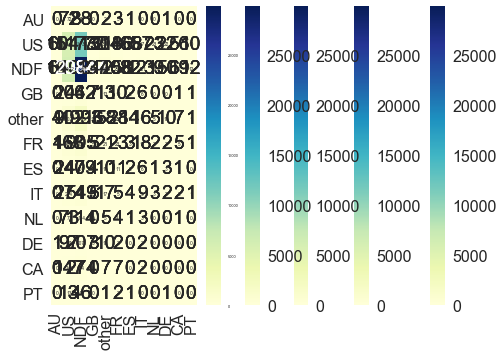

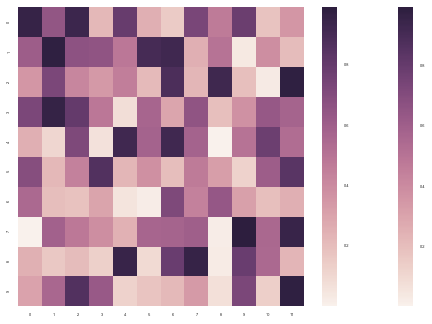